# Reconstruction error

In [1]:
include("/Net/Groups/BGI/people/gkraemer/progs/data_cube/julia/notebooks/stuff.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11102613078397925306\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5726458243910610130\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/user/gkraemer//assetserver/549eec07f928a744cd5cefcd9652eb9af414188d-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-11102613078397925306\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Warning: RCall.jl: Loading required package: sp
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Checking rgeos availability: TRUE
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Loading required package: zoo
│ 
│ Attaching package: 'zoo'
│ 
│ The following objects are masked from 'package:base':
│ 
│     as.Date, as.Date.numeric
│ 
│ Loading required package: sandwich
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packag

PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 

In [2]:
pca_recon_error_1_sp = loadCube(joinpath(cubes_base_dir, "pca_recon_error_1_sp"))
pca_recon_error_1_lat = loadCube(joinpath(cubes_base_dir, "pca_recon_error_1_lat"))
pca_recon_error_2_sp = loadCube(joinpath(cubes_base_dir, "pca_recon_error_2_sp"))
pca_recon_error_2_lat = loadCube(joinpath(cubes_base_dir, "pca_recon_error_2_lat"))
pca_recon_error_3_sp = loadCube(joinpath(cubes_base_dir, "pca_recon_error_3_sp"))
pca_recon_error_3_lat = loadCube(joinpath(cubes_base_dir, "pca_recon_error_3_lat"))

Memory mapped cube with the following dimensions
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 3.52 KB


In [37]:
R"""
library(viridis)
library(rworldmap)
data(coastsCoarse, package = "rworldmap")

options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width = 700, height = 400, ...))

elem_col = "black" # "gray50"
from_to = 120:700

#pal <- c("#fff7fb", "#ece7f2", "#d0d1e6", "#a6bddb", "#74a9cf", "#3690c0", "#0570b0", "#045a8d", "#023858")
#pal <- colorRampPalette(colors = pal)(100)
pal <- rev(viridis(100))

data1 <- $(pca_recon_error_1_sp[:, :] |> collect |> x -> x[:, end:-1:1] |> missing_to_nan .|> Float64)
data2 <- $(pca_recon_error_2_sp[:, :] |> collect |> x -> x[:, end:-1:1] |> missing_to_nan .|> Float64)
data3 <- $(pca_recon_error_3_sp[:, :] |> collect |> x -> x[:, end:-1:1] |> missing_to_nan .|> Float64)

ex <- range(c(range(data1, na.rm = TRUE), range(data2, na.rm = TRUE), range(data3, na.rm = TRUE)))
ex <- c(0, ex[2] * 0.3)

upper_margin = 2.1

data_lat1 <- $(pca_recon_error_1_lat[:] |> collect |> x -> x[:, end:-1:1] |> missing_to_nan .|> Float64)
data_lat2 <- $(pca_recon_error_2_lat[:] |> collect |> x -> x[:, end:-1:1] |> missing_to_nan .|> Float64)
data_lat3 <- $(pca_recon_error_3_lat[:] |> collect |> x -> x[:, end:-1:1] |> missing_to_nan .|> Float64)
data_lat1[is.na(data_lat1)] <- 0
data_lat1 <- rev(as.vector(data_lat1))
data_lat2[is.na(data_lat2)] <- 0
data_lat2 <- rev(as.vector(data_lat2))
data_lat3[is.na(data_lat3)] <- 0
data_lat3 <- rev(as.vector(data_lat3))

pdf($(joinpath(fig_path, "recon_error_pc123.pdf")), width = 7, height = 9)
layout(matrix(c(1:6), byrow = TRUE, ncol = 2), widths = c(1, 0.2))


plot_map <- function(data, ex, pal) {
    par(mar = c(4.2, 4.3, upper_margin, 0), xpd = FALSE)
    image(
        seq(from = -180, to = 180, length.out = dim(data)[1] + 1),
        seq(from = -90 * ((360 - 120) / 360),
            to   =  90 * (360 - 20) / 360,
            length.out = length(from_to) + 1),
        #seq(from = 120, to = 700, length.out = length(from_to) + 1),
        data[,from_to], 
        zlim = ex, 
        col = pal, 
        #xaxt = "n", 
        #yaxt = "n",
        xlab = expression("Lon " * group("[", degree, "]")),
        ylab = expression("Lat " * group("[", degree, "]")),
        las = 1,
        bty = "n", 
        useRaster = TRUE
    )
    image(
        seq(from = -180, to = 180, length.out = dim(data)[1] + 1),
        seq(from = -90 * ((360 - 120) / 360),
            to   =  90 * (360 - 20) / 360,
            length.out = length(from_to) + 1),
        data[,from_to], 
        zlim = c(ex[2], 99999), 
        col = pal[length(pal)], 
        xaxt = "n", 
        yaxt = "n",
        xlab = NULL,
        ylab = NULL,
        bty = "n", 
        useRaster = TRUE,
        add = TRUE
    )
    plot(coastsCoarse, add = TRUE)
}


#box(col = elem_col)
#box(col = elem_col)
plot_margin <- function(data_lat, ex, pal){
    # The right margin is required, because pdf rendering of raster objects and vector objects at the border is weird.
    par(mar = c(4.2, 0, upper_margin, 0.1))
    image(
        seq(from = 0, to = ex[2], length.out = 101),
        0:1,
        t(t(seq(from = ex[1], to = ex[2], length.out = 100))),
        col = pal, bty = "n", 
        xaxt = "n", yaxt = "n",
        ylab = NA,
        #xlim = c(0, max(data_lat[from_to]) * 0.9),
        #xlim = c(0, 1.2),
        xlab = expression("MSE " * group("[", "std" ^ 2, "]")),
        useRaster = TRUE
    )
    par(xpd = NA)
    polygon(
        # we need to extend the range, so that the background image is generously covered.
        x = c(0,   ex[2] + 1, ex[2] + 1,    0, data_lat[from_to]),
        y = c(1.01,   1.01,  -0.0, -0.0, seq(from = 0, to = 1, length.out = length(from_to))),
        col = "white",
        # we also need a border because rendering the polygon without border looks weird on some devices
        border = "white", 
        lwd = 1
    )
    polygon(
        x = c(data_lat[from_to]),
        y = seq(from = 0, to = 1, length.out = length(from_to)),
        lwd = 1
    )
    axis(1)
}

plot_map(data1, ex, pal)
plot_margin(data_lat1, ex, pal)
plot_map(data2, ex, pal)
plot_margin(data_lat2, ex, pal)
plot_map(data3, ex, pal)
plot_margin(data_lat3, ex, pal)


#grid.lines(1 / 1.2, c(2/3 + 0.07, 3/3 - 0.005))
#grid.lines(1 / 1.2, c(1/3 + 0.07, 2/3 - 0.005))
#grid.lines(1 / 1.2, c(0/3 + 0.07, 1/3 - 0.005))
grid.text("(a)",     0, 3/3, just = c(-3.0, 1.5))
grid.text("(b)", 1/1.2, 3/3, just = c(-0.1, 1.5))
grid.text("(c)",     0, 2/3, just = c(-3.0, 1.5))
grid.text("(d)", 1/1.2, 2/3, just = c(-0.1, 1.5))
grid.text("(e)",     0, 1/3, just = c(-3.0, 1.5))
grid.text("(f)", 1/1.2, 1/3, just = c(-0.1, 1.5))
#box(col = elem_col)
dev.off()
"""

show_pdf("https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/recon_error_pc123.pdf", width = 700, height = 1000)

(object { attributes=Dict(:type=>"application/pdf",:height=>"1000",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/recon_error_pc123.pdf",:width=>"700") }
  "pdf not found")

In [4]:
pca_recon_error_2 = loadCube(joinpath(cubes_base_dir, "pca_recon_error_2"))
pca_recon_error_1 = loadCube(joinpath(cubes_base_dir, "pca_recon_error_1"))
cube_pca_online = loadCube(joinpath(cubes_base_dir, "cube_pca_online"))
cube_base = getCubeData(Cube(data_cube_dir), variable = vars, time = (Date("2001-01-01"), Date("2011-12-31")))

Data Cube view with the following dimensions
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
Variable            Axis with 12 elements: black_sky_albedo evaporation .. terrestrial_ecosystem_respiration white_sky_albedo 
Total size: 29.32 GB


In [5]:
function find_max(x)
    xx = x[:, :, :, :]
    local p_max
    local lat_max 
    local lon_max 
    local t_max 
    m = 0.0
    for t in 1:506
        for lat in 1:720
            for lon in 1:1440
                for p in 1:2
                    tmp = xx[p, lon, lat, t]
                    if !ismissing(tmp) && m < abs(tmp)
                        m = abs(tmp)
                        p_max = p
                        lat_max = lat
                        lon_max = lon
                        t_max = t
                    end
                end
            end
        end
    end
    return (m = m, p_max = p_max, lat_max = lat_max, lon_max = lon_max, t_max = t_max)
end
                

find_max (generic function with 1 method)

Widgets.Widget{:ESDLPlot,Compose.Context}(OrderedCollections.OrderedDict{Symbol,Any}(:PcaAxis=>Widget{:dropdown,Any}(OrderedCollections.OrderedDict{Symbol,Any}(:options=>Observable{Any} with 2 listeners. Value:
["PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5", "PCA_6", "PCA_7", "PCA_8", "PCA_9", "PCA_10", "PCA_11", "PCA_12"],:index=>Observable{Any} with 2 listeners. Value:
1), Observable{Any} with 2 listeners. Value:
"PCA_1", Scope("knockout-component-9b7f7822-c10a-4dcc-92ca-1f7b29c1303e", Node{DOM}(DOM(:html, :div), Any["PcaAxis", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")), 0)], Dict{Symbol,Any}(:className=>"select "), 1)], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column")), 3), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_1","val"=>1,"id"=>"idk9Oq2Ztt"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_2","val"=>2,"id"=>"ideC1mBfmM"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_3","val"=>3,"id"=>"idn7CH3xLv"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_4","val"=>4,"id"=>"idlcmOUHtt"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_5","val"=>5,"id"=>"idQp5kmQ35"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_6","val"=>6,"id"=>"idhaZycAdA"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_7","val"=>7,"id"=>"idJNPLZucm"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_8","val"=>8,"id"=>"id8cQJ8mj4"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_9","val"=>9,"id"=>"idtLh9RdAl"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_10","val"=>10,"id"=>"idlERpQkjt"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_11","val"=>11,"id"=>"idmuF3McxR"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_12","val"=>12,"id"=>"idlia3otX2")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/all.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/style.css", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"options_js\\\":[{\\\"key\\\":\\\"PCA_1\\\",\\\"val\\\":1,\\\"id\\\":\\\"idk9Oq2Ztt\\\"}
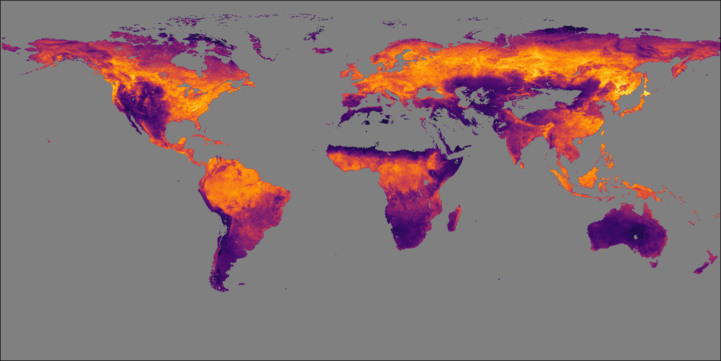
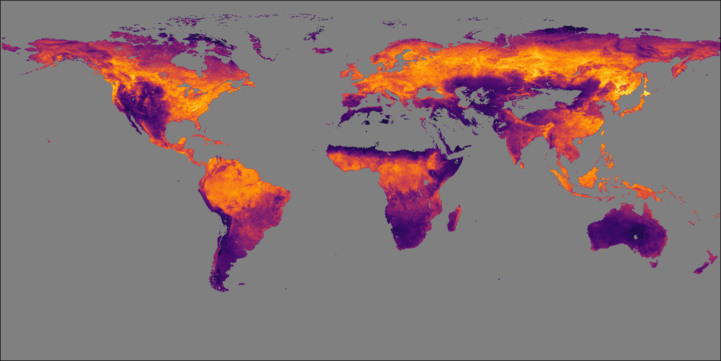

In [6]:
plotMAP(cube_pca_online)

Widgets.Widget{:ESDLPlot,Compose.Context}(OrderedCollections.OrderedDict{Symbol,Any}(:Time=>Widget{:slider,Date}(OrderedCollections.OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
253,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["2001-01-01", "2001-01-09", "2001-01-17", "2001-01-25", "2001-02-02", "2001-02-10", "2001-02-18", "2001-02-26", "2001-03-06", "2001-03-14"  …  "2011-10-16", "2011-10-24", "2011-11-01", "2011-11-09", "2011-11-17", "2011-11-25", "2011-12-03", "2011-12-11", "2011-12-19", "2011-12-27"],:formatted_value=>Observable{String} with 1 listeners. Value:
"2006-06-26",:value=>Observable{Date} with 2 listeners. Value:
2006-06-26), Observable{Date} with 2 listeners. Value:
2006-06-26, Scope("knockout-component-506c815e-0fb0-4f7b-9413-858b3fb7d440", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["Time"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>506,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["2001-01-01", "2001-01-09", "2001-01-17", "2001-01-25", "2001-02-02", "2001-02-10", "2001-02-18", "2001-02-26", "2001-03-06", "2001-03-14"  …  "2011-10-16", "2011-10-24", "2011-11-01", "2011-11-09", "2011-11-17", "2011-11-25", "2011-12-03", "2011-12-11", "2011-12-19", "2011-12-27"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"2006-06-26", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
253, nothing)), Set(String[]), nothing, Any["knockout"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/all.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/style.css", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\
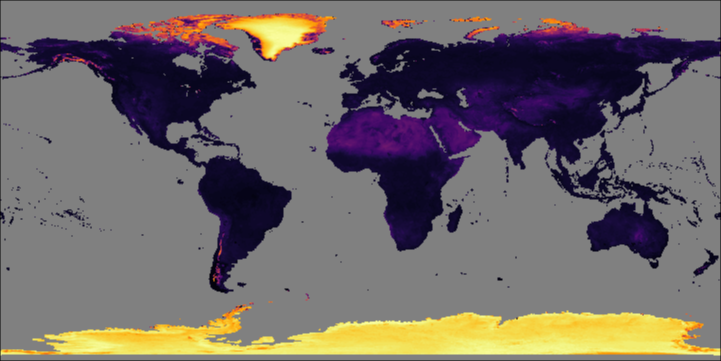
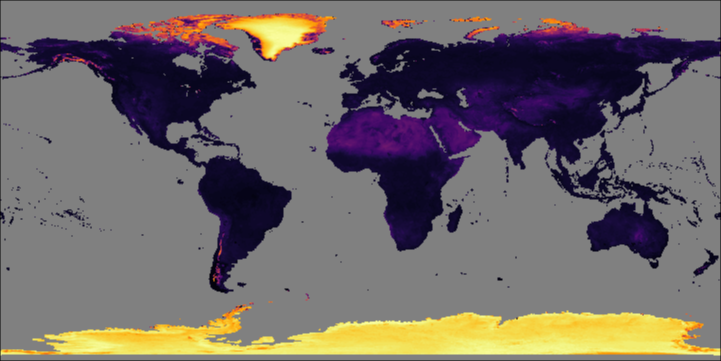

In [7]:
plotMAP(cube_base)

In [8]:
cube_pca_online[2, :, 720, :]

1440×506 reshape(::Array{Union{Missing, Float32},4}, 1440, 506) with eltype Union{Missing, Float32}:
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing

In [9]:
cube_base.varAxis.values |> collect

12-element Array{String,1}:
 "black_sky_albedo"                 
 "evaporation"                      
 "evaporative_stress"               
 "fapar_tip"                        
 "gross_primary_productivity"       
 "latent_energy"                    
 "net_ecosystem_exchange"           
 "root_moisture"                    
 "sensible_heat"                    
 "surface_moisture"                 
 "terrestrial_ecosystem_respiration"
 "white_sky_albedo"                 

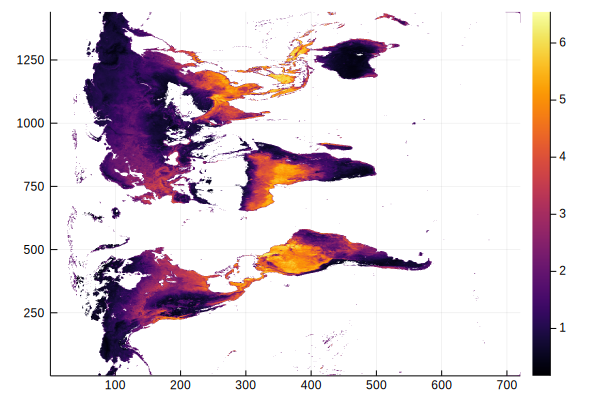

In [10]:
cube_base[:,:, 402, 11] |> collect |> missing_to_nan |> heatmap